# Module 2: User Management

### Overview

In this module we'll create an Amazon Cognito user pool to manage your users' accounts. We'll deploy pages that enable customers to register as a new user, verify their email address, and sign into the site.

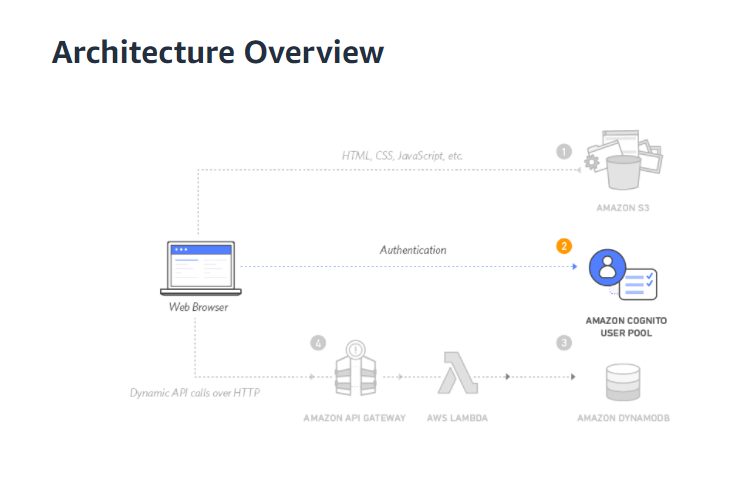

When users visit your website they will first register a new user account. For the purposes of this workshop we'll only require them to provide an email address and password to register. However, you can configure Amazon Cognito to require additional attributes in your own applications.


After users submit their registration, Amazon Cognito will send a confirmation email with a verification code to the address they provided. To confirm their account, users will return to your site and enter their email address and the verification code they received. You can also confirm user accounts using the Amazon Cognito console if want to use fake email addresses for testing.


After users have a confirmed account (either using the email verification process or a manual confirmation through the console), they will be able to sign in. When users sign in, they enter their username (or email) and password. A JavaScript function then communicates with Amazon Cognito, authenticates using the Secure Remote Password protocol (SRP), and receives back a set of JSON Web Tokens (JWT). The JWTs contain claims about the identity of the user and will be used in the next module to authenticate against the RESTful API you build with Amazon API Gateway

## Implementation

In [ ]:
1. Create an Amazon Cognito User Pool

Amazon Cognito provides two different mechanisms for authenticating users. You can use Cognito User Pools to add sign-up and 
sign-in functionality to your application or use Cognito Identity Pools to authenticate users through social identity providers
such as Facebook, Twitter, or Amazon, with SAML identity solutions, or by using your own identity system. 
For this module you'll use a user pool as the backend for the provided registration and sign-in pages.

a. From the AWS Console click Services then select Cognito under Mobile Services
b. Choose Manage your User Pools
c. Choose Create a User Pool
d. Provide a name for your user pool such as WildRydes, then select Review Defaults
e. On the review page, click Create pool
f. Note the Pool Id on the Pool details page of your newly created user pool.

2. Add an app to your user pool:
    
From the Amazon Cognito console select your user pool and then select the App clients section. Add a new app client and make sure the Generate client secret option is deselected. Client secrets aren't currently supported with the JavaScript SDK. If you do create an app with a generated secret, delete it and create a new one with the correct configuration.

a. From the Pool Details page for your user pool, select App clients from the left General Settings section in the navigation bar.
b. Choose Add an app client.
c. Give the app client a name such as WildRydesWebApp.
d. Uncheck the Generate client secret option. Client secrets aren't currently supported for use with browser-based applications.
e. Choose Create app client.
f. Note the App client id for the newly created application.

In [ ]:
3. Update the website config

The updated config.js file should look like this. Note that the actual values for your file will be different:
window._config = {
    cognito: {
        userPoolId: 'us-west-2_uXboG5pAb', // e.g. us-east-2_uXboG5pAb
        userPoolClientId: '25ddkmj4v6hfsfvruhpfi7n4hv', // e.g. 25ddkmj4v6hfsfvruhpfi7n4hv
        region: 'us-west-2' // e.g. us-east-2
    },
    api: {
        invokeUrl: '' // e.g. https://rc7nyt4tql.execute-api.us-west-2.amazonaws.com/prod',
    }
};

4. Validate

a. Visit /register.html under your website domain, or choose the Giddy Up! button on the homepage of your site.
b. Complete the registration form and choose Let's Ryde. You can use your own email or enter a fake email. Make sure to choose a password that contains at least one upper-case letter, a number, and a special character. Don't forget the password you entered for later. You should see an alert that confirms that your user has been created.
c. Confirm your new user using one of the two following methods.
d. If you used an email address you control, you can complete the account verification process by visiting /verify.html under your website domain and entering the verification code that is emailed to you. Please note, the verification email may end up in your spam folder. For real deployments we recommend configuring your user pool to use Amazon Simple Email Service to send emails from a domain you own.
e. If you used a dummy email address, you must confirm the user manually through the Cognito console.
f. From the AWS console, click Services then select Cognito under Security, Identity & Compliance.
g. Choose Manage your User Pools
h. Select the WildRydes user pool and click Users and groups in the left navigation bar.
i. You should see a user corresponding to the email address that you submitted through the registration page. Choose that username to view the user detail page.
j. Choose Confirm user to finalize the account creation process.
k. After confirming the new user using either the /verify.html page or the Cognito console, visit /signin.html and log in using the email address and password you entered during the registration step.
l. If successful you should be redirected to /ride.html. You should see a notification that the API is not configured.